In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

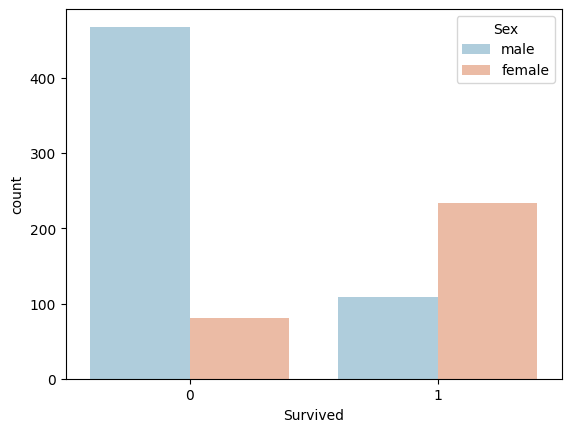

In [12]:
sns.countplot(x="Survived", data=train,hue="Sex",palette='RdBu_r')


<Axes: xlabel='Survived', ylabel='count'>

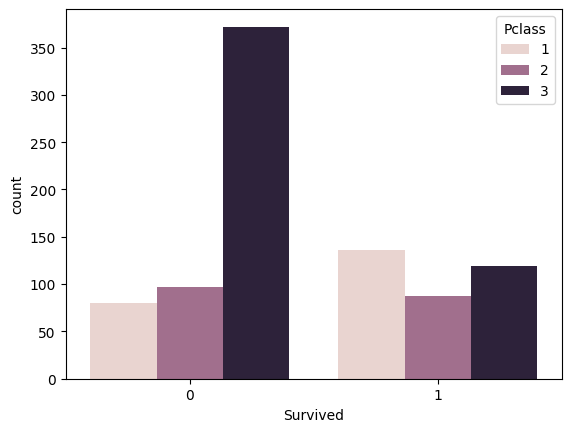

In [14]:
sns.countplot(x="Survived", data=train,hue="Pclass")

<Axes: xlabel='Age', ylabel='Count'>

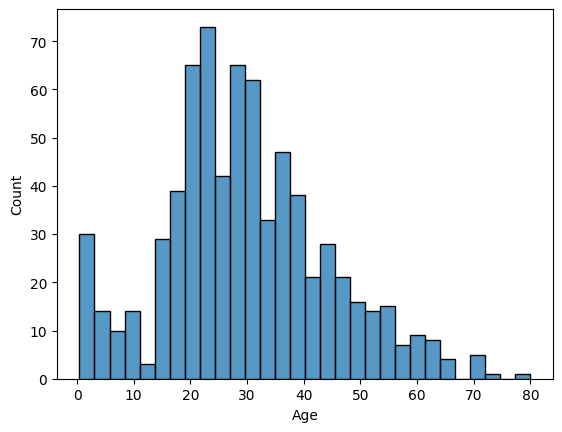

In [19]:
sns.histplot(train['Age'].dropna(),kde=False,bins=30)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
def null_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        elif Pclass ==3:
            return 24
    else:
        return Age

In [22]:
train["Age"]=train[["Age","Pclass"]].apply(null_age,axis=1)

C:\Users\chanu\AppData\Local\Temp\ipykernel_19156\3032594550.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\chanu\AppData\Local\Temp\ipykernel_19156\3032594550.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [24]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
train.dropna(inplace=True)

In [31]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [36]:
sex =pd.get_dummies(train["Sex"],drop_first=True)

In [40]:
embark =pd.get_dummies(train["Embarked"],drop_first=True)

In [41]:
train = pd.concat([train,sex,embark],axis=1)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   male      889 non-null    bool   
 8   Q         889 non-null    bool   
 9   S         889 non-null    bool   
dtypes: bool(3), float64(2), int64(4), object(1)
memory usage: 58.2+ KB


In [53]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,True,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False,False,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False,False,True
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,True,False,True


In [54]:
train.tail()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.00,True,False,True
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.00,False,False,True
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",24.0,1,2,23.45,False,False,True
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.00,True,False,False
890,0,3,"Dooley, Mr. Patrick",32.0,0,0,7.75,True,True,False


In [59]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,True,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False,False,False
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False,False,True
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,True,False,True


In [60]:
train.drop("Name",axis=1,inplace=True)

In [61]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


# *Create model*

In [63]:
X = train.drop('Survived',axis=1)
y= train['Survived']

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel = LogisticRegression()

In [70]:
logmodel.fit(X_train,y_train)

c:\Users\chanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
prediction = logmodel.predict(X_test)

In [74]:
from sklearn.metrics import classification_report

In [75]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.83      0.90      0.86       163\n           1       0.82      0.71      0.76       104\n\n    accuracy                           0.83       267\n   macro avg       0.83      0.81      0.81       267\nweighted avg       0.83      0.83      0.83       267\n'

In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
confusion_matrix(y_test,prediction)

array([[147,  16],
       [ 30,  74]])